In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [4]:
df= pd.read_csv("/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
#drop nan values 
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
#scaling part to standardize the data 
df1 = ((df1 - df1.min()) / (df1.max() - df1.min())) * 9 + 1
df1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,5.667253,3.839355,5.844199,5.126520,3.909502,5.081383,4.207474,4.937142,4.352710,3.901264,4.493532,5.423139,4.010014
std,1.922747,1.987019,1.320372,1.549282,1.397199,1.942296,1.896567,2.113359,1.624994,1.780254,1.672475,2.340628,2.021517
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.155921,2.534091,5.090909,4.061856,2.760870,3.366379,2.642405,3.377358,3.384858,2.489761,3.213415,3.200549,2.428317
50%,5.784211,3.000988,5.812834,5.128866,3.739130,5.267241,4.408228,4.566038,4.250789,3.618601,4.548780,5.978022,3.538873
75%,7.270395,5.166502,6.763369,6.056701,4.619565,6.648276,5.813291,6.221698,5.372240,4.778157,5.682927,7.263736,5.538516
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
#intialize random centroids 
def random_centroids (df1, k):
    centroids= []
    for i in range (k):
        centroid= df1.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis= 1)


In [8]:
centroids= random_centroids(df1, 5)
centroids

/tmp/ipykernel_32/1889919750.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid= df1.apply(lambda x: float(x.sample()))


,0,1,2,3,4
Alcohol,6.992105,5.334211,3.486842,3.202632,6.234211
Malic_Acid,8.488142,3.330040,2.298419,5.553360,6.513834
Ash,4.080214,5.283422,6.631016,6.053476,6.101604
Ash_Alcanity,7.680412,6.752577,5.175258,3.876289,5.360825
Magnesium,2.369565,4.619565,4.130435,5.206522,2.663043
Total_Phenols,6.400000,4.786207,7.113793,6.400000,4.165517
Flavanoids,2.860759,6.563291,2.784810,5.310127,6.240506
Nonflavanoid_Phenols,2.867925,4.226415,1.169811,6.094340,2.358491
Proanthocyanins,3.668770,5.457413,3.640379,3.668770,3.924290
Color_Intensity,1.514505,4.701365,1.668089,2.512799,4.394198


In [9]:
#labeling 
def get_labels(df1, centroids):
    distances= centroids.apply(lambda x: np.sqrt(((df1 - x)** 2).sum(axis= 1)))
    return distances.idxmin(axis= 1)

In [10]:
labels= get_labels(df1, centroids)

In [11]:
labels.value_counts()

1    70
4    41
3    40
0    14
2    13
Name: count, dtype: int64

In [12]:
#function to update  a new centroids
def new_centroids(df1, labels, k):
    return df1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [13]:
#for the visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [17]:
#function to plot or visualization 
def plot_cluster(df1, labels, centroids, iteration):
    pca= PCA(n_components= 2)
    data_2d= pca.fit_transform(df1)
    centroids_2d= pca.transform(centroids.T)
    clear_output(wait= True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x= data_2d[:,0], y= data_2d[:,1],c= labels)
    plt.scatter(x= centroids_2d[:,0], y= centroids_2d[:,1])
    plt.show()

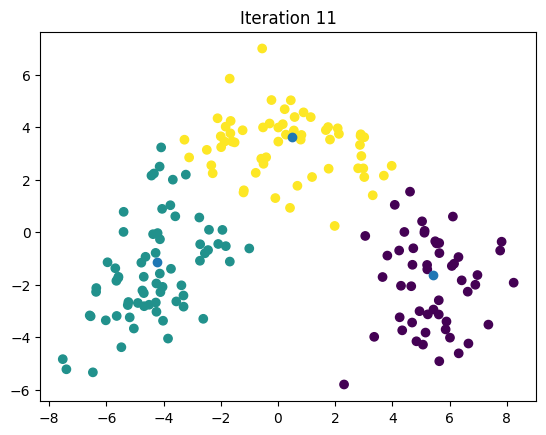

In [19]:
max_iteration= 100
k = 3

centroids = random_centroids(df1, k)
old_centroids= pd.DataFrame()
iteration= 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids= centroids 
    
    labels= get_labels(df1, centroids)
    centroids= new_centroids(df1, labels, k)
    plot_cluster(df1, labels, centroids, iteration)
    iteration +=1